In [1]:
pip install catboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modellinng
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost.sklearn import  XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings

In [5]:
df = pd.read_csv('stud.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x = df.drop(columns=['math score'], axis=1)

In [8]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math score']

In [10]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [11]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("standardScaler", numeric_transformer, num_features),
    ] 
) 

In [12]:
x = preprocessor.fit_transform(x)

In [13]:
x.shape

(1000, 19)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test, y_train, y_test =  train_test_split(x ,y,test_size=0.2 , random_state=42)
x_train.shape , x_test.shape

((800, 19), (200, 19))

In [16]:
def evaluate_model (true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae , rmse , r2_square

In [17]:
models = {
    "linear Regression": LinearRegression(),
    "lasso" : Lasso(),
    "ridge": Ridge(),
    "k-Neighbours Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "Catboosting Regressor" : CatBoostRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)    # train model

    ##make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # evaluate train and test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-  Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-  R2 Score: {:.4f}".format(model_train_r2))
                                       
    print('---------------------------------------')
    print('Model Performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-  Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-  R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_train_r2)

    print('='*35)
    print('\n')

linear Regression
Model Performance for Training set
- Root Mean Squared Error: 5.3243
-  Mean Absolute Error: 4.2671
-  R2 Score: 0.8743
---------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3960
-  Mean Absolute Error: 4.2158
-  R2 Score: 0.8803


lasso
Model Performance for Training set
- Root Mean Squared Error: 6.5938
-  Mean Absolute Error: 5.2063
-  R2 Score: 0.8071
---------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.5197
-  Mean Absolute Error: 5.1579
-  R2 Score: 0.8253


ridge
Model Performance for Training set
- Root Mean Squared Error: 5.3233
-  Mean Absolute Error: 4.2650
-  R2 Score: 0.8743
---------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 5.3904
-  Mean Absolute Error: 4.2111
-  R2 Score: 0.8806


k-Neighbours Regressor
Model Performance for Training set
- Root Mean Squared Error: 5.7077
-  Mean Absolute Error: 4.5167
-  R2 Score: 

d:\mlprojects\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\mlprojects\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\mlprojects\venv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\mlprojects\venv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\mlprojects\venv\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


Random Forest Regressor
Model Performance for Training set
- Root Mean Squared Error: 2.2849
-  Mean Absolute Error: 1.8209
-  R2 Score: 0.9768
---------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.0247
-  Mean Absolute Error: 4.6743
-  R2 Score: 0.8508


XGB Regressor
Model Performance for Training set
- Root Mean Squared Error: 1.0073
-  Mean Absolute Error: 0.6875
-  R2 Score: 0.9955
---------------------------------------
Model Performance for Test set
- Root Mean Squared Error: 6.4733
-  Mean Absolute Error: 5.0577
-  R2 Score: 0.8278


Learning rate set to 0.039525
0:	learn: 14.5987177	total: 156ms	remaining: 2m 36s
1:	learn: 14.2251886	total: 158ms	remaining: 1m 18s
2:	learn: 13.8866124	total: 158ms	remaining: 52.7s
3:	learn: 13.5235688	total: 159ms	remaining: 39.6s
4:	learn: 13.1887021	total: 160ms	remaining: 31.9s
5:	learn: 12.9124226	total: 161ms	remaining: 26.6s
6:	learn: 12.6000335	total: 162ms	remaining: 22.9s
7:	learn: 12.3299

In [19]:
pd.DataFrame(list(zip(model_list , r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending =False)

,Model Name,R2_Score
4,Decision Tree,0.999653
6,XGB Regressor,0.995500
5,Random Forest Regressor,0.976843
7,Catboosting Regressor,0.958936
2,ridge,0.874304
0,linear Regression,0.874257
3,k-Neighbours Regressor,0.855498
8,Adaboost Regressor,0.852183
1,lasso,0.807146


Linear regression
--------

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


Text(0, 0.5, 'Predictions')

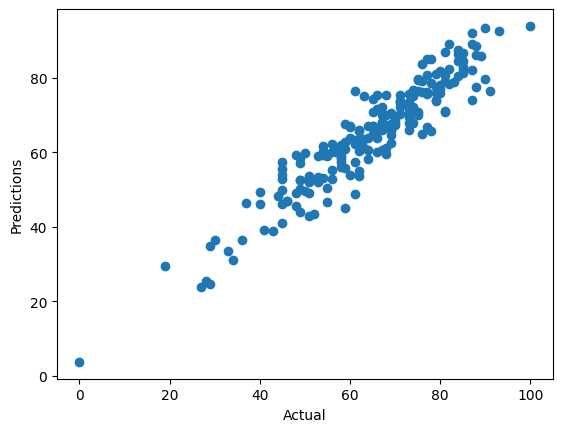

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predictions')


<Axes: xlabel='math score'>

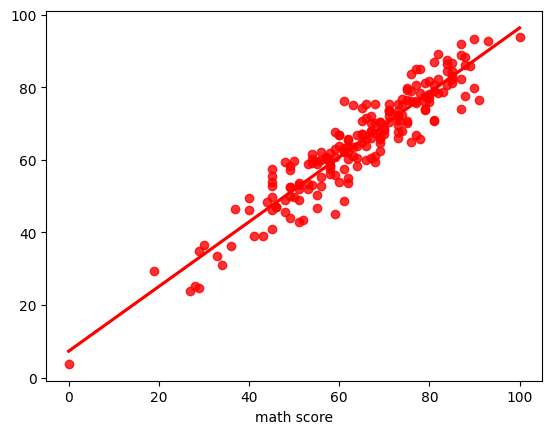

In [22]:
sns.regplot(x=y_test , y=y_pred, ci=None , color='red')

Difference betweeen actual and predicted values
--------

In [23]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'predicted value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,predicted value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
